In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_tweets_df = pd.read_csv('elon_twitter_database\elon_sentsubj.csv')
bitcoin_values_df = pd.read_csv('bitcoin_database\Cleaned\BTCUSDT.csv')
dogecoin_values_df = pd.read_csv('dogecoin_database\Cleaned\DOGEUSDT.csv')

cyrpto_btcval_tweets = pd.read_csv('crypto_btcval_tweets.csv')
cyrpto_dogeval_tweets = pd.read_csv('crypto_dogeval_tweets.csv')

In [3]:
# Creating new dataframes for plotting Tweets Per Day vs Trades Per Day
bitcoin_values_df['Open Time'] = pd.to_datetime(bitcoin_values_df['Open Time'],unit='ms')
bitcoin_values_df = bitcoin_values_df[['Open Time', 'Trades']]
bitcoin_values_df = bitcoin_values_df.groupby(pd.to_datetime(bitcoin_values_df['Open Time']).dt.date).agg({'Trades': 'sum'}).reset_index() 
bitcoin_values_df.columns = ['Date', ' Btc Trades']
bitcoin_values_df.drop(bitcoin_values_df.head(4).index, inplace=True)

dogecoin_values_df['Open Time'] = pd.to_datetime(dogecoin_values_df['Open Time'],unit='ms')
dogecoin_values_df = dogecoin_values_df[['Open Time', 'Trades']]
dogecoin_values_df = dogecoin_values_df.groupby(pd.to_datetime(dogecoin_values_df['Open Time']).dt.date).agg({'Trades': 'sum'}).reset_index() 
dogecoin_values_df.columns = ['Date', 'Doge Trades']

all_tweets_df = all_tweets_df[['created_at', 'tweet']]
all_tweets_df = all_tweets_df.groupby(pd.to_datetime(all_tweets_df['created_at']).dt.date).agg({'tweet': 'count'}).reset_index() 
all_tweets_df.columns = ['Date', 'Tweets']

merged_tweet_values = all_tweets_df.merge(bitcoin_values_df, on='Date', how='right').merge(dogecoin_values_df, on='Date', how='left')

In [4]:
# Fill days Elon didn't tweet with '0'
merged_tweet_values = merged_tweet_values.fillna(0)

In [5]:
# Create plot for merged_tweet_values: Compare Tweets vs Trades per day
# One plot per coin type

In [6]:
# Create a dataframe for crypto_btcval_tweets

# Column Needed: created_at, is_btc, is_crypto, is_tesla, 5 minutes change, 30 minutes change
# Use is_btc to find all rows with value '1', then make a new dataframe for those rows
# Repeat to find rows for is_crypto
# Repeat again to find rows for is_tesla
# After all this feel free to edit column names to make them look better

# Using those 3 new dataframes create scatter plots
# 5 minutes change
# 30 minutes change
# We'll end up with 6 scatter plots, 3 for 5 minutes change, and 3 for 30 minutes change

In [7]:
# Create a dataframe for crypto_dogeval_tweets

# Column Needed: created_at, is_doge, is_crypto, is_tesla, 5 minutes change, 30 minutes change
# Use is_btc to find all rows with value '1', then make a new dataframe for those rows
# Repeat to find rows for is_crypto
# Repeat again to find rows for is_tesla
# After all this feel free to edit column names to make them look better

# Using those 3 new dataframes create scatter plots
# 5 minutes change
# 30 minutes change
# We'll end up with 6 scatter plots, 3 for 5 minutes change, and 3 for 30 minutes change

In [8]:
dogecoin_values_df.head()
cyrpto_dogeval_tweets.head()



,id,created_at,tweet,noun_phrases,polarity,subjectivity,is_btc,is_doge,is_crypto,is_tesla,5 minutes beginning value,5 minutes end value,5 minutes change pct,30 minutes beginning value,30 minutes end value,30 minutes change pct
0,1.215527e+18,2020-01-09 22:53:10,Bitcoin is *not* my safe word,"['bitcoin', 'safe word']",0.500,0.500,1.0,0.0,1.0,0.0,0.002133,0.002133,-0.000094,0.002133,0.002123,-0.004781
1,1.237785e+18,2020-03-11 09:57:51,Moon too,['moon'],0.000,0.000,0.0,0.0,1.0,0.0,0.002182,0.002181,-0.000367,0.002182,0.002165,-0.007472
2,1.256351e+18,2020-05-01 15:34:24,@Bitcoin 🤣🤣,['bitcoin'],0.000,0.000,1.0,0.0,1.0,0.0,0.002485,0.002479,-0.002535,0.002485,0.002461,-0.009737
3,1.256354e+18,2020-05-01 15:44:56,@Bitcoin How much for some anime Bitcoin? htt...,"['bitcoin', 'bitcoin']",0.200,0.200,1.0,0.0,1.0,0.0,0.002480,0.002479,-0.000444,0.002480,0.002457,-0.009274
4,1.284290e+18,2020-07-17 17:53:43,"@izzynobre Excuse me, I only sell Doge!","['@ izzynobre', 'excuse', 'doge']",-0.025,0.525,0.0,1.0,1.0,0.0,0.003020,0.003029,0.002980,0.003020,0.003027,0.002252


<AxesSubplot:xlabel='created_at', ylabel='5 minutes change pct'>

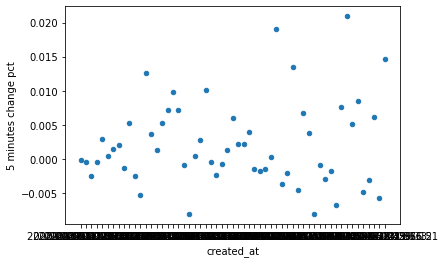

In [9]:

cyrpto_dogeval_tweets.plot.scatter(x='created_at', y='5 minutes change pct')

<AxesSubplot:xlabel='created_at', ylabel='5 minutes change pct'>

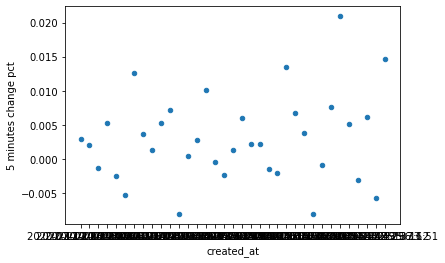

In [10]:
only_doge_tweet_df = cyrpto_dogeval_tweets[cyrpto_dogeval_tweets['is_doge'] > 0]

only_doge_tweet_df.plot.scatter(x='created_at', y='5 minutes change pct')

<AxesSubplot:xlabel='created_at', ylabel='5 minutes change pct'>

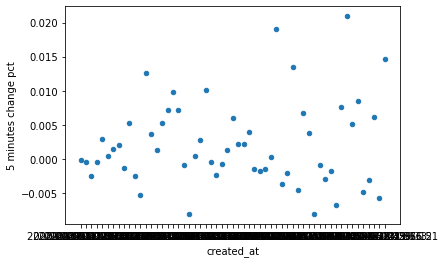

In [11]:
only_crypto_tweets_df = cyrpto_dogeval_tweets[cyrpto_dogeval_tweets['is_crypto'] > 0]
only_crypto_tweets_df.plot.scatter(x='created_at', y='5 minutes change pct')

<AxesSubplot:xlabel='created_at', ylabel='5 minutes change pct'>

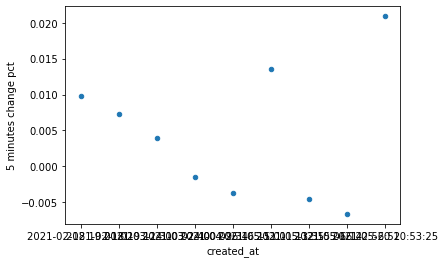

In [12]:
only_tesla_tweets_df = cyrpto_dogeval_tweets[cyrpto_dogeval_tweets['is_tesla'] > 0]
only_tesla_tweets_df.plot.scatter(x='created_at', y='5 minutes change pct')

In [13]:
only_doge_tweet_df['created_at'].max()

'2021-05-25 13:16:51'

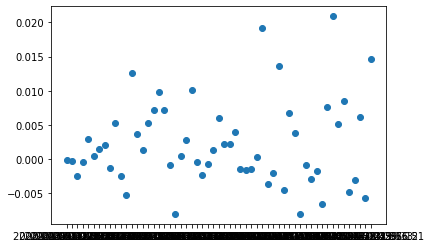

In [16]:
only_doge_tweet_df = only_doge_tweet_df.sort_values(by='created_at')

first_doge_tweet_date = only_doge_tweet_df['created_at'].min()

last_doge_tweet_date = only_doge_tweet_df['created_at'].max()

fig = plt.scatter( only_crypto_tweets_df['created_at'], only_crypto_tweets_df['5 minutes change pct'])
